In [17]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data from the Excel file
file_path = r"LivreDA V2.xlsx"
data = pd.read_excel(file_path)

# Clean the data
# Remove columns where more than 50% of the values are missing
threshold = len(data) * 0.5
data_clean = data.dropna(thresh=threshold, axis=1)

# Remove rows with missing values in the remaining columns
data_clean = data_clean.dropna()

print(f"Number of lines after cleaning: {len(data_clean)}")



Nombre de lignes après nettoyage: 7798


In [18]:
# Encode categorical columns into numeric values
label_encoders = {}
for col in ['authors', 'publisher', 'language_code']:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col].astype(str))
    label_encoders[col] = le

In [12]:
# Convert 'publication_date' to datetime format and extract the publication year
data_clean['publication_date'] = pd.to_datetime(data_clean['publication_date'], errors='coerce')
data_clean['publication_year'] = data_clean['publication_date'].dt.year.fillna(0).astype(int)

# Convert missing values in 'has_spoiler' to 0 or 1 (assuming NaN means no spoiler)
data['has_spoiler'] = data['has_spoiler'].fillna(0).astype(int)

# Selecting only numeric columns for correlation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix including 'has_spoiler'
correlation_matrix = data[numeric_columns].corr()


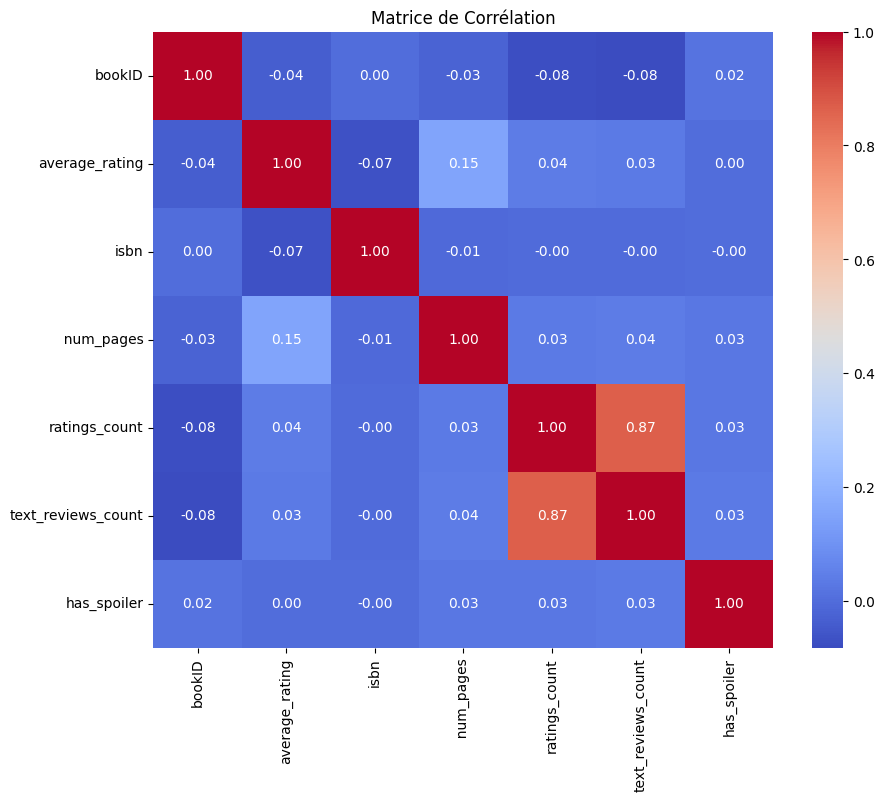

In [13]:
# Display the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [14]:
# Select columns with significant correlation to the target variable
correlated_features = ['ratings_count', 'text_reviews_count']

# Recreate X with only these correlated features
X_corr = data_clean[correlated_features]
y = data_clean['average_rating']

# Split the data into training and test sets
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y, test_size=0.2, random_state=42)
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    return rmse

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}




C:\Users\alid7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE pour Régression Linéaire : 0.2716668275257229


C:\Users\alid7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE pour Random Forest : 0.3030662026300094
RMSE pour SVR : 0.2709900682215876
RMSE pour KNN : 0.2943883750840297

Résumé des performances :
Régression Linéaire: RMSE = 0.2716668275257229
Random Forest: RMSE = 0.3030662026300094
SVR: RMSE = 0.2709900682215876
KNN: RMSE = 0.2943883750840297


C:\Users\alid7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\alid7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


              Feature  Importance
0       ratings_count    0.593709
1  text_reviews_count    0.406291


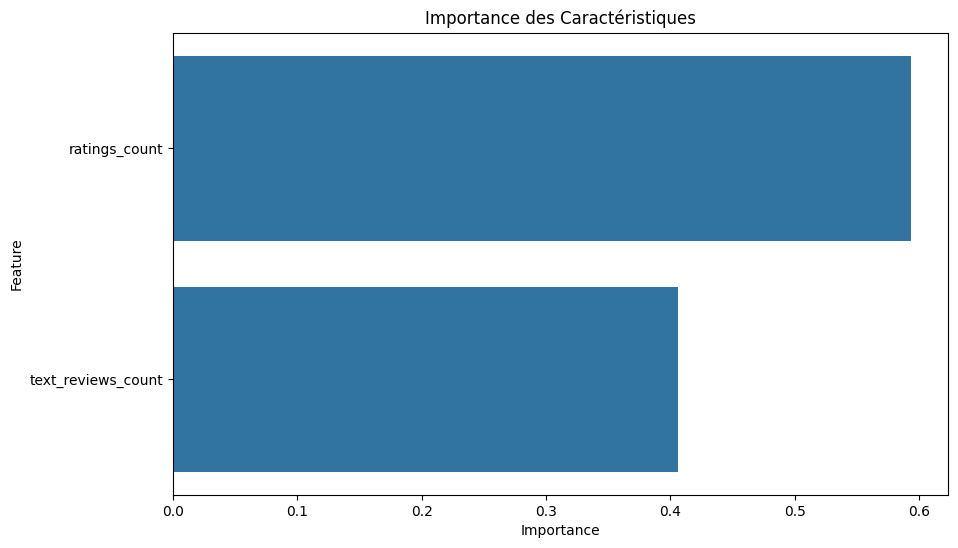

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_corr, y_train_corr)

# Feature importance
importances = rf_model.feature_importances_

# Create a DataFrame to organize the feature importances
feature_importances = pd.DataFrame({'Feature': X_corr.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importance des Caractéristiques')
plt.show()


In [16]:
# Evaluate each model and display the results
results = {}
for name, model in models.items():
    rmse = evaluate_model(model, X_train_corr, y_train_corr, X_test_corr, y_test_corr)
    results[name] = rmse
    print(f"RMSE pour {name} : {rmse}")

# Summary of all model performances
print("\nRésumé des performances :")
for model_name, rmse_value in results.items():
    print(f"{model_name}: RMSE = {rmse_value}")

C:\Users\alid7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE pour Régression Linéaire : 0.2716668275257229


C:\Users\alid7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE pour Random Forest : 0.3030662026300094
RMSE pour SVR : 0.2709900682215876
RMSE pour KNN : 0.2943883750840297

Résumé des performances :
Régression Linéaire: RMSE = 0.2716668275257229
Random Forest: RMSE = 0.3030662026300094
SVR: RMSE = 0.2709900682215876
KNN: RMSE = 0.2943883750840297


C:\Users\alid7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\alid7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
